# Pogodynka :)

In [4]:
import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.mlab import griddata
from scipy.interpolate import griddata
okno=plt.figure(figsize=(14,10), dpi=100)

polaczenie = pyodbc.connect("""DRIVER={ODBC Driver 17 for SQL Server};
                            SERVER=sqltester2018.wwsi.edu.pl;
                            DATABASE=synop;
                            uid=uos2019;
                            pwd=wwsi2019uos""") 


zapytanie = """SELECT 
                    dl,
                    szer,
                    nr
               FROM PolskaPunkty """

tabelka= pd.read_sql(zapytanie, polaczenie)

zapytanie="""with ct as
(
   Select top 1 godzina
   from Depesze
   where data=cast(getdate() as date)
   group by godzina
   having count(*)>40
   order by godzina desc
)
SELECT  distinct data,
        godzina,
        dlugosc as dl,
        szerokosc as szer,
        CisnienieNaPoziomieMorza as cisn,
        TemperaturaPowietrza as temp
from Depesze as D join Stacje as s ON D.stacja=S.idstacji
where kraj='Poland' and data=cast(getdate() as date)
       and godzina=(Select godzina from ct)
      and CisnienieNaPoziomieMorza>0"""

dane=pd.read_sql(zapytanie, polaczenie)
#print(dane)
plt.plot(tabelka['dl'], tabelka['szer'])
plt.axis('off')

dl=list(dane['dl'])
szer=list(dane['szer'])
cisn=list(dane['cisn'])
dlgr=np.linspace(min(tabelka['dl']), max(tabelka['dl']), 500)
szergr=np.linspace(min(tabelka['szer']), max(tabelka['szer']), 500)

X, Y = np.meshgrid(dlgr, szergr)

Z = griddata(dl, szer, cisn, X, Y,interp='linear') 
izo=range(int(min(dane['cisn']))-1, int(max(dane['cisn']))+1, 2 )

contour = plt.contour(X, Y, Z, levels=izo)
plt.clabel(contour, fontsize='medium', inline_spacing=2, fmt='%d') 

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 17 for SQL Server' : file not found (0) (SQLDriverConnect)")

<Figure size 1400x1000 with 0 Axes>

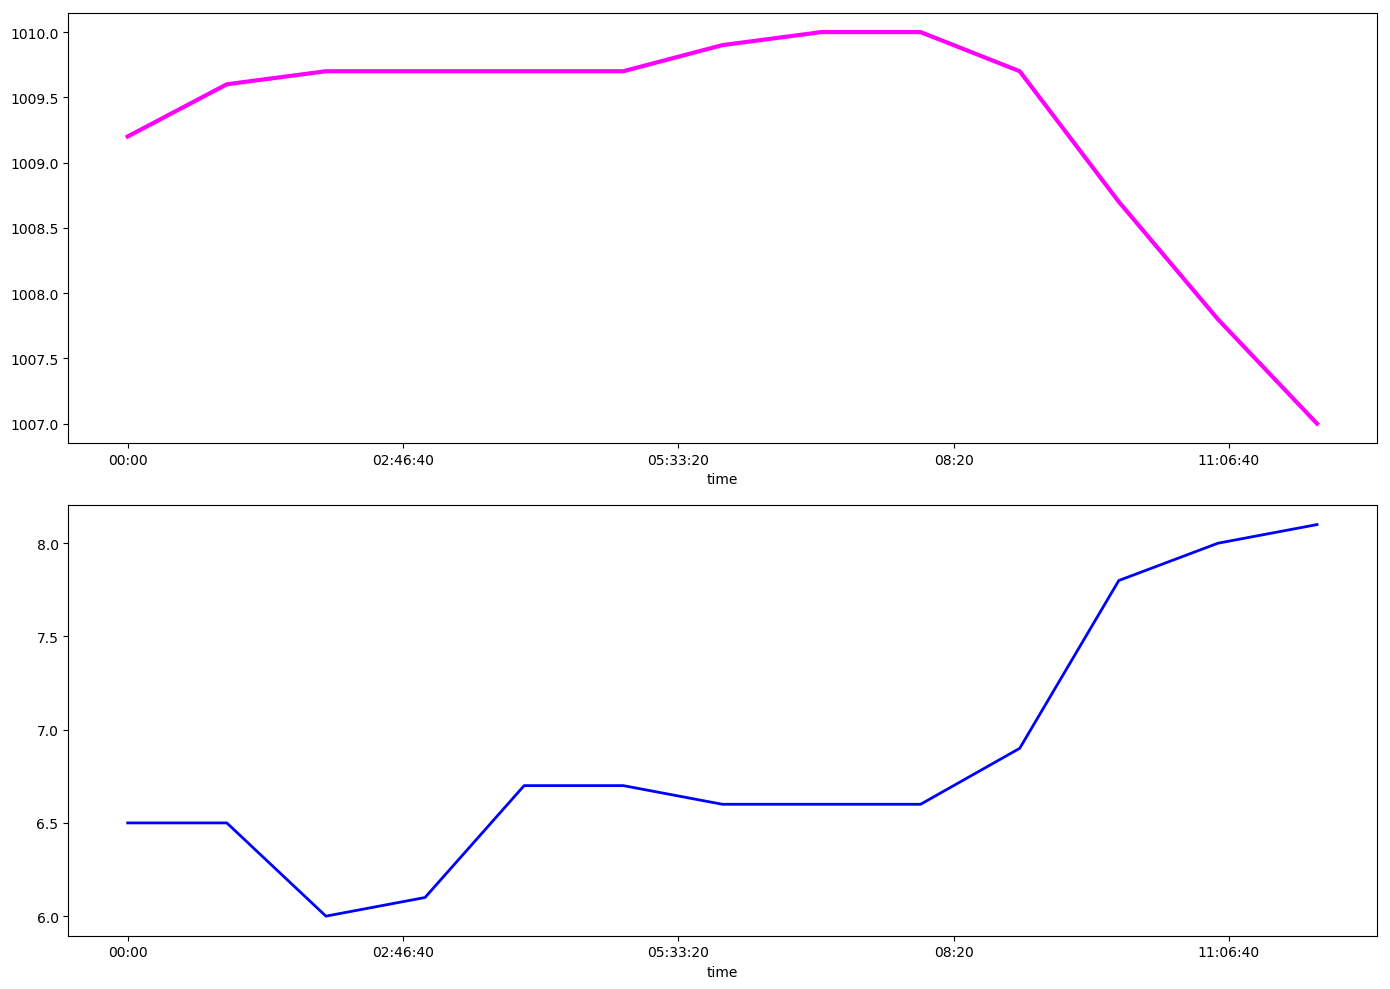

In [ ]:
import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt

okno=plt.figure(figsize=(14,10), dpi=100)
polaczenie = pyodbc.connect("""DRIVER={ODBC Driver 17 for SQL Server};
                            SERVER=sqltester2018.wwsi.edu.pl;
                            DATABASE=synop;
                            uid=uos2019;
                            pwd=wwsi2019uos""") 

zapytanie="""
SELECT  distinct data,
        godzina,
        dlugosc as dl,
        szerokosc as szer,
        CisnienieNaPoziomieMorza as cisn,
        TemperaturaPowietrza as temp
from Depesze as D join Stacje as s ON D.stacja=S.idstacji
where kraj='Poland' and data=cast(getdate() as date)
       and stacja='12375'
      and CisnienieNaPoziomieMorza>0"""

dane=pd.read_sql(zapytanie, polaczenie)

plt.subplot(2,1,1)

plt.plot(dane['godzina'],dane['cisn'], color='magenta', lw=3)
plt.subplot(2,1,2)
plt.plot(dane['godzina'],dane['temp'], color='blue', lw=2)
plt.tight_layout()

In [5]:

#%%sh
#curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
##curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
#sudo apt-get update
#sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

#!pip install pyodbc

##%matplotlib notebook

okno=plt.figure(figsize=(8,6), dpi=100)

polaczenie = pyodbc.connect("""DRIVER={ODBC Driver 17 for SQL Server};
                            SERVER=analityk.wwsi.edu.pl,50221;
                            DATABASE=synop;
                            uid=student;
                            pwd=ciekawski""") 
zapytanie = """SELECT 
                    dl,
                    szer,
                    nr
               FROM PolskaPunkty """
kontury=pd.read_sql(zapytanie, polaczenie)
#print(kontury)

zapytanie="""
SELECT  distinct data,
        godzina,
        CisnienieNaPoziomieMorza as cisn,
        TemperaturaPowietrza as temp,
        TemperaturaPunktuRosy as tempR,
        row_number() over (Order by data,godzina) as nr
from Depesze 
where data> dateadd(day,-3,cast(getdate() as date))
       and stacja='12375'
      """
daneW=pd.read_sql(zapytanie, polaczenie)
#print(daneW)

zapytanie="""with ct as
(
   Select top 1 godzina
   from Depesze
   where data=cast(getdate() as date)
   group by godzina
   having count(*)>40
   order by godzina desc
)
SELECT  distinct data,
        godzina,
        dlugosc as dl,
        szerokosc as szer,
        CisnienieNaPoziomieMorza as cisn,
        TemperaturaPowietrza as temp
from Depesze as D join Stacje as s ON D.stacja=S.idstacji
where kraj='Poland' and data=cast(getdate() as date)
       and godzina=(Select godzina from ct)
      and CisnienieNaPoziomieMorza>0"""
daneI=pd.read_sql(zapytanie, polaczenie)
daneI.head()

#obszar=plt.subplot(4,1,1)
plt.plot(daneW['nr'], daneW['cisn'], color='blue')
#plt.set_title('Zmiany ciśnienia w Warszawie')




plt.show()

Error: ('01000', "[01000] [unixODBC][Driver Manager]Can't open lib 'ODBC Driver 17 for SQL Server' : file not found (0) (SQLDriverConnect)")

<Figure size 800x600 with 0 Axes>